[1] "Number of Samples in our Biom Table"


[1] 207

[1] "Number of Sequence variants we have."


[1] 2602

[1] "Sequencing depth."


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 4532877  7949730  9897549 11268334 13440524 30800723 

595.T1_RE8_01_33117 576.T5_BF11_01_33368  585.T3_BB3_01_33182 
             4532877              4536638              4585675 
 583.T5_BG5_01_33375  585.T0_RB3_01_33073  588.T5_BG9_01_33379 
             4740326              4995143              5002816 
577.T5_BF12_01_33369 583.CT5_BB3_01_33413  584.T0_RB2_01_33072 
             5182670              5231305              5484288 
585.T1_RD11_01_33107  596.T4_BE9_01_33353 573.CT5_BA7_01_33404 
             5670427              5745523              6009823 
 582.T2_RG4_01_33142 582.T3_BA12_01_33178  582.T5_BG4_01_33374 
             6038130              6194230              6373841 
 583.T3_BB1_01_33180  578.T4_BD5_01_33210  577.T4_BD4_01_33209 
             6492383              6493480              6552949 
 581.T2_RG3_01_33141 575.T5_BF10_01_33367  584.T2_RG6_01_33144 
             6561712              6721939              6771429 
584.T1_RD10_01_33106 576.T2_RF11_01_33136 573.T4_BC12_01_33204 
             6778044              6827855              6830087 
585.CT5_BB5_01_33415 
             6877359

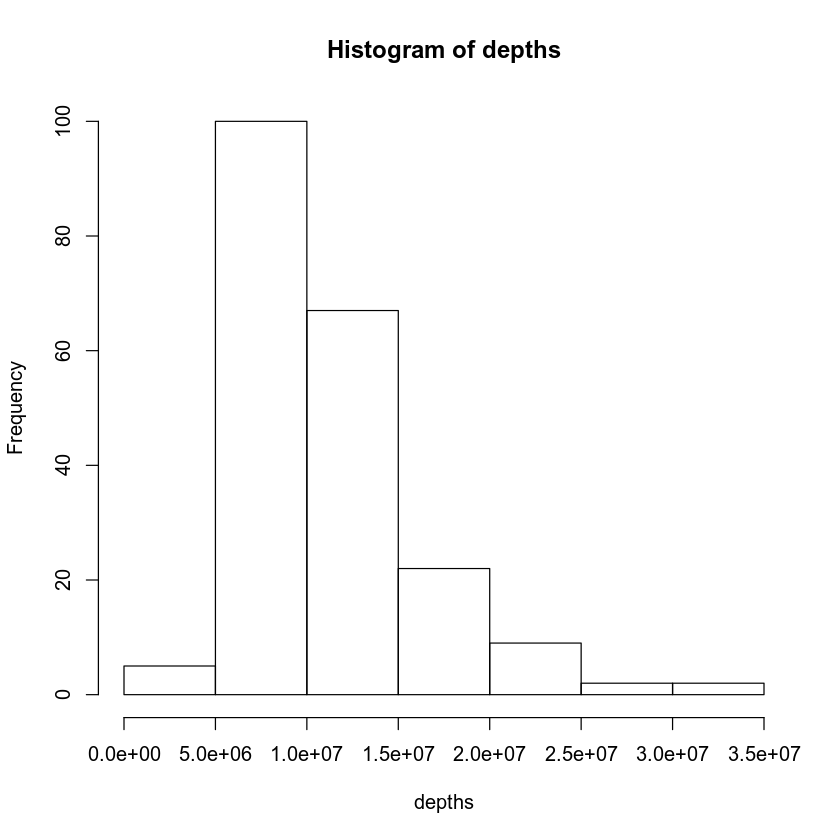

In [31]:
library(phyloseq)
library(ggplot2)
library(dplyr)
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("Unknown_Cutoff.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("Mapping_file_w_og.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)
meta_table<-data.frame(meta_table)
#Now load the taxonomy (this is fake)
OTU_taxonomy<-read.csv("taxonomy.csv",row.names=1,check.names=FALSE)
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)
# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq)),25)

In [29]:
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '5')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

[1] Placebo   Co-P      Letrozole Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 2
Levels: 2

In [10]:
# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq.pt, sample.size = 4530000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth

In [11]:
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
meta.rarefy=subset_samples(meta.rarefy, type == 'fecal')
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('Metabolite_Cutoff_T2_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()

#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Category, as(sample_data(meta.rarefy), "data.frame"), permutations=1000, method='bray', weighted=FALSE)
a$aov.tab


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups     3 0.03739 0.0124632 3.0864    999  0.043 *
Residuals 28 0.11307 0.0040381                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups     3 0.03739 0.0124632 3.0864    999  0.047 *
Residuals 28 0.11307 0.0040381                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

png 
  2

[1] "BarcodeSequence"            "LinkerPrimerSequence"      
 [3] "filename"                   "ID_OG_MAP"                 
 [5] "Barcode"                    "adaptor"                   
 [7] "TSRI_Seq_plate"             "Well_Position"             
 [9] "Sequenc_.Name"              "Sequence"                  
[11] "PCR_Date"                   "Mouse"                     
[13] "Cage"                       "Week"                      
[15] "mouse.time"                 "Cecum"                     
[17] "Category_type_time"         "weight"                    
[19] "Category"                   "type"                      
[21] "Lh"                         "Insulin"                   
[23] "Testosterone"               "Weight_g"                  
[25] "observed_SVs1250"           "pielou_e1250"              
[27] "faith_pd1250"               "shannon1250"               
[29] "FBG"                        "Description"               
[31] "ATTRIBUTE_GNPSDefaultGroup"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,2.227863,0.7426212,6.095338,0.3950656,0.000999001
Residuals,28,3.411360,0.1218343,NA,0.6049344,NA
Total,31,5.639224,NA,NA,1.0000000,NA


In [12]:
CategorybetaDNA


	Homogeneity of multivariate dispersions

Call: betadisper(d = d, group = sampledf$Category)

No. of Positive Eigenvalues: 31
No. of Negative Eigenvalues: 0

Average distance to median:
     Co-L      Co-P Letrozole   Placebo 
   0.2784    0.2947    0.3514    0.3564 

Eigenvalues for PCoA axes:
(Showing 8 of 31 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
2.1266 0.4432 0.3690 0.3086 0.2562 0.2395 0.2038 0.1778 

In [13]:
meta.rarefy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2088 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 2088 taxa by 7 taxonomic ranks ]

In [14]:
# Calculate distances
meta.rarefy=subset_samples(meta.rarefy, type == 'fecal' )
set.seed(123)
DistBC = distance(meta.rarefy, method = "bray")
#ordination
ordBC = ordinate(meta.rarefy, method = "NMDS", distance = DistBC)

Run 0 stress 0.1024477 
Run 1 stress 0.1100675 
Run 2 stress 0.1072785 
Run 3 stress 0.1024477 
... Procrustes: rmse 8.144385e-05  max resid 0.0003651294 
... Similar to previous best
Run 4 stress 0.1078921 
Run 5 stress 0.1119651 
Run 6 stress 0.1307716 
Run 7 stress 0.1050306 
Run 8 stress 0.1072783 
Run 9 stress 0.1222766 
Run 10 stress 0.1220036 
Run 11 stress 0.1237396 
Run 12 stress 0.1167801 
Run 13 stress 0.1077955 
Run 14 stress 0.1077954 
Run 15 stress 0.1077955 
Run 16 stress 0.1024477 
... Procrustes: rmse 3.59949e-05  max resid 0.0001558139 
... Similar to previous best
Run 17 stress 0.1119652 
Run 18 stress 0.1318448 
Run 19 stress 0.1050303 
Run 20 stress 0.1077974 
*** Solution reached


In [15]:
                 
cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Category 
)
pdf('Metabolite_Cutoff_T2_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Category",shape = "Category",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite T2") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()

png 
  2

In [16]:
print('BrayCurtis Permanova')
a=adonis(DistBC ~  Category, as(sample_data(meta.rarefy), "data.frame"), permutations=1000, method='bray')
a$aov.tab

[1] "BrayCurtis Permanova"


,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,2.227863,0.7426212,6.095338,0.3950656,0.000999001
Residuals,28,3.411360,0.1218343,NA,0.6049344,NA
Total,31,5.639224,NA,NA,1.0000000,NA


# CAP T5 BA

In [17]:
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

[1] Letrozole Placebo   Co-L      Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 5
Levels: 5

In [18]:
# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq.pt, sample.size = 4530000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
meta.rarefy=subset_samples(meta.rarefy, type == 'fecal')
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('Metabolite_Cutoff_T5_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()
#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Category, as(sample_data(meta.rarefy), "data.frame"), permutations=100, method='bray', weighted=FALSE)
a$aov.tab


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.008358 0.0027861 0.9542    999  0.435
Residuals 28 0.081751 0.0029197                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.008358 0.0027861 0.9542    999  0.425
Residuals 28 0.081751 0.0029197                     

png 
  2

[1] "BarcodeSequence"            "LinkerPrimerSequence"      
 [3] "filename"                   "ID_OG_MAP"                 
 [5] "Barcode"                    "adaptor"                   
 [7] "TSRI_Seq_plate"             "Well_Position"             
 [9] "Sequenc_.Name"              "Sequence"                  
[11] "PCR_Date"                   "Mouse"                     
[13] "Cage"                       "Week"                      
[15] "mouse.time"                 "Cecum"                     
[17] "Category_type_time"         "weight"                    
[19] "Category"                   "type"                      
[21] "Lh"                         "Insulin"                   
[23] "Testosterone"               "Weight_g"                  
[25] "observed_SVs1250"           "pielou_e1250"              
[27] "faith_pd1250"               "shannon1250"               
[29] "FBG"                        "Description"               
[31] "ATTRIBUTE_GNPSDefaultGroup"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,0.6046178,0.2015393,1.379082,0.1287368,0.04950495
Residuals,28,4.0919254,0.1461402,NA,0.8712632,NA
Total,31,4.6965432,NA,NA,1.0000000,NA


In [19]:
CategorybetaDNA


	Homogeneity of multivariate dispersions

Call: betadisper(d = d, group = sampledf$Category)

No. of Positive Eigenvalues: 31
No. of Negative Eigenvalues: 0

Average distance to median:
     Co-L      Co-P Letrozole   Placebo 
   0.3697    0.3561    0.3636    0.3275 

Eigenvalues for PCoA axes:
(Showing 8 of 31 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
0.6735 0.4684 0.4497 0.3520 0.3395 0.2926 0.2278 0.1941 

In [20]:
meta.rarefy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1961 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 1961 taxa by 7 taxonomic ranks ]

In [21]:
# Calculate distances
meta.rarefy=subset_samples(meta.rarefy, type == 'fecal' )
set.seed(123)
DistBC = distance(meta.rarefy, method = "bray")
#ordination
ordBC = ordinate(meta.rarefy, method = "NMDS", distance = DistBC)

Run 0 stress 0.2335205 
Run 1 stress 0.2334365 
... New best solution
... Procrustes: rmse 0.03316744  max resid 0.1542197 
Run 2 stress 0.2285289 
... New best solution
... Procrustes: rmse 0.13362  max resid 0.6038356 
Run 3 stress 0.2358673 
Run 4 stress 0.252035 
Run 5 stress 0.2379475 
Run 6 stress 0.2750234 
Run 7 stress 0.2313188 
Run 8 stress 0.2349244 
Run 9 stress 0.2334186 
Run 10 stress 0.2327126 
Run 11 stress 0.2492624 
Run 12 stress 0.2487494 
Run 13 stress 0.2313781 
Run 14 stress 0.2453091 
Run 15 stress 0.2446711 
Run 16 stress 0.2453543 
Run 17 stress 0.2373175 
Run 18 stress 0.2404158 
Run 19 stress 0.2303059 
Run 20 stress 0.2530108 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


In [22]:
cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Category 
)
pdf('Metabolite_Cutoff_T5_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Category",shape = "Category",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite T5") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()

png 
  2

In [23]:
print('BrayCurtis Permanova')
a=adonis(DistBC ~  Category, as(sample_data(meta.rarefy), "data.frame"), permutations=1000, method='bray')
a$aov.tab

[1] "BrayCurtis Permanova"


,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,0.6046178,0.2015393,1.379082,0.1287368,0.007992008
Residuals,28,4.0919254,0.1461402,NA,0.8712632,NA
Total,31,4.6965432,NA,NA,1.0000000,NA


# CAP T0

In [30]:
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '5' & Week != '1'& Week != '3'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq.pt, sample.size = 4530000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
meta.rarefy=subset_samples(meta.rarefy, type == 'fecal')
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('Metabolite_Cutoff_T0_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()
#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Category, as(sample_data(meta.rarefy), "data.frame"), permutations=100, method='bray', weighted=FALSE)
a$aov.tab

cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Category 
)
pdf('Metabolite_Cutoff_T0_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Category",shape = "Category",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite T0") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()

[1] Letrozole Placebo   Co-P      Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 0
Levels: 0


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups     3 0.06867 0.0228898 2.6239    999  0.056 .
Residuals 28 0.24426 0.0087235                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups     3 0.06867 0.0228898 2.6239    999  0.044 *
Residuals 28 0.24426 0.0087235                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

png 
  2

[1] "BarcodeSequence"            "LinkerPrimerSequence"      
 [3] "filename"                   "ID_OG_MAP"                 
 [5] "Barcode"                    "adaptor"                   
 [7] "TSRI_Seq_plate"             "Well_Position"             
 [9] "Sequenc_.Name"              "Sequence"                  
[11] "PCR_Date"                   "Mouse"                     
[13] "Cage"                       "Week"                      
[15] "mouse.time"                 "Cecum"                     
[17] "Category_type_time"         "weight"                    
[19] "Category"                   "type"                      
[21] "Lh"                         "Insulin"                   
[23] "Testosterone"               "Weight_g"                  
[25] "observed_SVs1250"           "pielou_e1250"              
[27] "faith_pd1250"               "shannon1250"               
[29] "FBG"                        "Description"               
[31] "ATTRIBUTE_GNPSDefaultGroup"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,0.4587321,0.1529107,0.9581512,0.09310136,0.6336634
Residuals,28,4.4685006,0.1595893,NA,0.90689864,NA
Total,31,4.9272327,NA,NA,1.00000000,NA


png 
  2

# T1

In [26]:
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '5' & Week != '0'& Week != '3'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq.pt, sample.size = 4530000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
meta.rarefy=subset_samples(meta.rarefy, type == 'fecal')
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('Metabolite_Cutoff_T1_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()
#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Category, as(sample_data(meta.rarefy), "data.frame"), permutations=100, method='bray', weighted=FALSE)
a$aov.tab

cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Category 
)
pdf('Metabolite_Cutoff_T1_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Category",shape = "Category",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite T1") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()

[1] Letrozole Co-L      Placebo   Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 1
Levels: 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.010403 0.0034678 0.9119    999  0.455
Residuals 28 0.106474 0.0038026                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.010403 0.0034678 0.9119    999  0.426
Residuals 28 0.106474 0.0038026                     

png 
  2

[1] "BarcodeSequence"            "LinkerPrimerSequence"      
 [3] "filename"                   "ID_OG_MAP"                 
 [5] "Barcode"                    "adaptor"                   
 [7] "TSRI_Seq_plate"             "Well_Position"             
 [9] "Sequenc_.Name"              "Sequence"                  
[11] "PCR_Date"                   "Mouse"                     
[13] "Cage"                       "Week"                      
[15] "mouse.time"                 "Cecum"                     
[17] "Category_type_time"         "weight"                    
[19] "Category"                   "type"                      
[21] "Lh"                         "Insulin"                   
[23] "Testosterone"               "Weight_g"                  
[25] "observed_SVs1250"           "pielou_e1250"              
[27] "faith_pd1250"               "shannon1250"               
[29] "FBG"                        "Description"               
[31] "ATTRIBUTE_GNPSDefaultGroup"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,0.7027586,0.2342529,1.703505,0.1543472,0.00990099
Residuals,28,3.8503435,0.1375123,NA,0.8456528,NA
Total,31,4.5531021,NA,NA,1.0000000,NA


png 
  2

# T3

In [4]:
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '5' & Week != '1'& Week != '0'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq.pt, sample.size = 4530000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
meta.rarefy=subset_samples(meta.rarefy, type == 'fecal')
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('Metabolite_Cutoff_T3_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()
#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Category, as(sample_data(meta.rarefy), "data.frame"), permutations=100, method='bray', weighted=FALSE)
a$aov.tab

cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Category 
)
pdf('Metabolite_Cutoff_T3_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Category",shape = "Category",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite T3") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()

[1] Placebo   Co-L      Letrozole Co-P     
Levels: Co-L Co-P Letrozole Placebo

[1] 3
Levels: 3


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.006584 0.0021945 0.4507    999  0.705
Residuals 28 0.136351 0.0048697                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.006584 0.0021945 0.4507    999  0.733
Residuals 28 0.136351 0.0048697                     

png 
  2

[1] "BarcodeSequence"            "LinkerPrimerSequence"      
 [3] "filename"                   "ID_OG_MAP"                 
 [5] "Barcode"                    "adaptor"                   
 [7] "TSRI_Seq_plate"             "Well_Position"             
 [9] "Sequenc_.Name"              "Sequence"                  
[11] "PCR_Date"                   "Mouse"                     
[13] "Cage"                       "Week"                      
[15] "mouse.time"                 "Cecum"                     
[17] "Category_type_time"         "weight"                    
[19] "Category"                   "type"                      
[21] "Lh"                         "Insulin"                   
[23] "Testosterone"               "Weight_g"                  
[25] "observed_SVs1250"           "pielou_e1250"              
[27] "faith_pd1250"               "shannon1250"               
[29] "FBG"                        "Description"               
[31] "ATTRIBUTE_GNPSDefaultGroup"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,0.597882,0.1992940,1.435459,0.133298,0.03960396
Residuals,28,3.887421,0.1388365,NA,0.866702,NA
Total,31,4.485303,NA,NA,1.000000,NA


png 
  2

# T4

In [6]:
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '5' & Week != '1'& Week != '3'& Week != '0'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq.pt, sample.size = 4530000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
meta.rarefy=subset_samples(meta.rarefy, type == 'fecal')
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('Metabolite_Cutoff_T4_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()
#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Category, as(sample_data(meta.rarefy), "data.frame"), permutations=100, method='bray', weighted=FALSE)
a$aov.tab

cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Category 
)
pdf('Metabolite_Cutoff_T4_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Category",shape = "Category",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite T4") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()

[1] Letrozole Co-P      Placebo   Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 4
Levels: 4


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.007386 0.0024621 0.7452    999  0.539
Residuals 28 0.092512 0.0033040                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.007386 0.0024621 0.7452    999  0.511
Residuals 28 0.092512 0.0033040                     

png 
  2

[1] "BarcodeSequence"            "LinkerPrimerSequence"      
 [3] "filename"                   "ID_OG_MAP"                 
 [5] "Barcode"                    "adaptor"                   
 [7] "TSRI_Seq_plate"             "Well_Position"             
 [9] "Sequenc_.Name"              "Sequence"                  
[11] "PCR_Date"                   "Mouse"                     
[13] "Cage"                       "Week"                      
[15] "mouse.time"                 "Cecum"                     
[17] "Category_type_time"         "weight"                    
[19] "Category"                   "type"                      
[21] "Lh"                         "Insulin"                   
[23] "Testosterone"               "Weight_g"                  
[25] "observed_SVs1250"           "pielou_e1250"              
[27] "faith_pd1250"               "shannon1250"               
[29] "FBG"                        "Description"               
[31] "ATTRIBUTE_GNPSDefaultGroup"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,0.5457665,0.1819222,1.186729,0.1128063,0.0990099
Residuals,28,4.2923208,0.1532972,NA,0.8871937,NA
Total,31,4.8380873,NA,NA,1.0000000,NA


png 
  2